<a href="https://colab.research.google.com/github/nguyendoanquangnhat/Fuzzy-Logic/blob/main/FuzzyLogic_EX5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#EX5.2: Controlling dynamics of a servomotor

In [2]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=591d8d352a875d82255df8f9df720de887540893f88d133c63ff9625f2668d72
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


0.38356810771976574


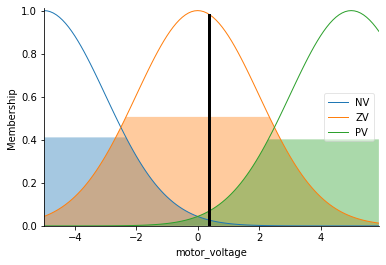

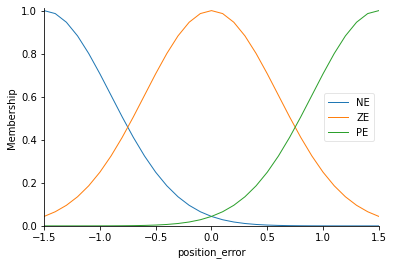

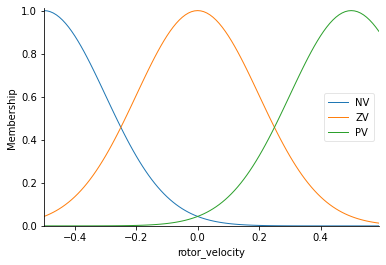

In [32]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl 

position_error = ctrl.Antecedent(np.arange(-1.5,1.6,0.1),'position_error')
rotor_velocity = ctrl.Antecedent(np.arange(-0.5,0.6,0.01),'rotor_velocity')
motor_voltage = ctrl.Consequent(np.arange(-5,6,0.1),'motor_voltage')

position_error['NE'] = fuzz.gaussmf(position_error.universe,-1.5,-0.6)
position_error['ZE'] = fuzz.gaussmf(position_error.universe,0,0.6)
position_error['PE'] = fuzz.gaussmf(position_error.universe,1.5,0.6)

rotor_velocity['NV'] = fuzz.gaussmf(rotor_velocity.universe,-0.5,-0.2)
rotor_velocity['ZV'] = fuzz.gaussmf(rotor_velocity.universe,0,0.2)
rotor_velocity['PV'] = fuzz.gaussmf(rotor_velocity.universe,0.5,0.2)

motor_voltage['NV'] = fuzz.gaussmf(motor_voltage.universe,-5,-2)
motor_voltage['ZV'] = fuzz.gaussmf(motor_voltage.universe,0,2)
motor_voltage['PV'] = fuzz.gaussmf(motor_voltage.universe,5,2)

rule1 = ctrl.Rule(position_error['NE'] & rotor_velocity['NV'], motor_voltage['NV'])
rule2 = ctrl.Rule(position_error['ZE'] & rotor_velocity['NV'], motor_voltage['NV'])
rule3 = ctrl.Rule(position_error['PE'] & rotor_velocity['NV'], motor_voltage['PV'])
rule4 = ctrl.Rule(position_error['NE'] & rotor_velocity['ZV'], motor_voltage['NV'])
rule5 = ctrl.Rule(position_error['ZE'] & rotor_velocity['ZV'], motor_voltage['ZV'])
rule6 = ctrl.Rule(position_error['PE'] & rotor_velocity['ZV'], motor_voltage['PV'])
rule7 = ctrl.Rule(position_error['NE'] & rotor_velocity['PV'], motor_voltage['NV'])
rule8 = ctrl.Rule(position_error['ZE'] & rotor_velocity['PV'], motor_voltage['PV'])
rule9 = ctrl.Rule(position_error['PE'] & rotor_velocity['PV'], motor_voltage['PV'])

motorcontrol_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
motorcontrol = ctrl.ControlSystemSimulation(motorcontrol_ctrl)
motorcontrol.input['position_error'] = -0.7
motorcontrol.input['rotor_velocity'] = 0.23
motorcontrol.compute()
print(motorcontrol.output['motor_voltage'])
motor_voltage.view(sim=motorcontrol)

position_error.view()
rotor_velocity.view()